# Importando as bibliotecas
**Bem Vinda(o).Neste arquivo apresento uma análise de dados com intuito educativo. O objetivo deste arquivo é aprender a utilizar a biblioteca seaborn em conjunto com o pandas durante a análise de dados.**

**Os dados abaixo foram fornecidos no curso da Alura e são dados de valor da conta em restaurantes e valor da gorjeta dada. Assim nos perguntamos se a gorjeta aumenta com o valor da conta. Vamos analisar**

In [2]:
import pandas as pd
import seaborn as sns

# Importando base de dados e alterando

In [3]:
dados = pd.read_csv('tips.csv', sep =',')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## **Abaixo vou alterar o nome das colunas traduzidas, e posteriormente vou traduzir os valores de cada variávels**

In [4]:
dados.rename(columns = {'total_bill': 'valor_conta' ,'tip':'gorjeta', 'dessert':'sobremesa','day':'dia','time':'hora_do_dia','size':'total_de_pessoas'},inplace = True)

**O método unique() retorna os valores presentes naquela variável especificada**

In [6]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

**O método map() mapeia os valores que você especificou em um dicionário. Os valores das chaves tomam o valor especificado**

In [7]:
dados.sobremesa.map({'Yes':'Sim','No':'Não'})

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [8]:
dados.sobremesa = dados.sobremesa.map({'Yes':'Sim','No':'Não'})

In [9]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


**Abaixo farei a tradução dos outros valores**

In [10]:
dados.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
renomear = {'Sun':'Dom', 'Sat':'Sab', 'Thur':'Qui', 'Fri':'Sex'}
dados.dia = dados.dia.map(renomear)

In [12]:
dados.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
renomar ={'Dinner':'Janta', 'Lunch':'Almoço'}
dados.hora_do_dia = dados.hora_do_dia.map(renomar)

In [14]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Janta,2
1,10.34,1.66,Não,Dom,Janta,3
2,21.01,3.50,Não,Dom,Janta,3
3,23.68,3.31,Não,Dom,Janta,2
4,24.59,3.61,Não,Dom,Janta,4


**Estando tudo traduzido podemos começar a mexer nos dados sem se preocupar com as diferença na língua**

# Gráficos Com Seaborn

**É importante analisar primeiro se existe algum valor missing no dataframe. Abaixo eu vejo se tem algum valor missing, e como não tem não é preciso trata-los**

In [15]:
## Será que existem valores nulos? Vou descobrir
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_conta       244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia               244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [16]:
dados.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia', 'hora_do_dia',
       'total_de_pessoas'],
      dtype='object')

**Para fazer um gráfico com o seaborn é importante saber qual gráfico quer fazer. No exemplo abaixo quero fazer um gráfico do tipo scatter por isso chamo o sns.scatterplot; Os outros detalhes importantes é o que vai no eixo x e no eixo y. Para este dois é preciso colocar o título coluna de dados do Dataframe; Por fim em data = deverá ser passado o nome do seu dataframe**

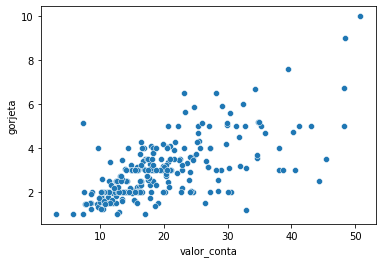

In [17]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y ='gorjeta',data = dados)

***No gráfico acima observa-se uma tendência de crescimento do valor da gorjeta em função do valor da conta***

# Melhorando a visualização

**Abaixo temos parte dos dados que importamos. Com esses dados vamos melhorar a apresentação dos gráficos**

In [65]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Janta,2,0.059
1,10.34,1.66,Não,Dom,Janta,3,0.161
2,21.01,3.50,Não,Dom,Janta,3,0.167
3,23.68,3.31,Não,Dom,Janta,2,0.140
4,24.59,3.61,Não,Dom,Janta,4,0.147


**Vamos colocar uma melhor cor de apresentação, um grid, título, alterar tamanho da fonte do gráfico gorjeta em função do valor da conta, mas para isto também precisamos do matplotlib**

In [69]:
import matplotlib.pyplot as plt

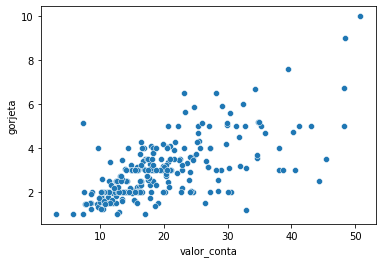

In [67]:
sns.scatterplot(x ='valor_conta', y = 'gorjeta', data = dados)

**Na ordem vamos:**


*   Aumentar o tamanho do gráfico
*   Colocar outra cor
*   Colocar um grid
* Para conhecer mais paletas pode entrar no link: [Paletas de Cores](https://seaborn.pydata.org/tutorial/color_palettes.html)*




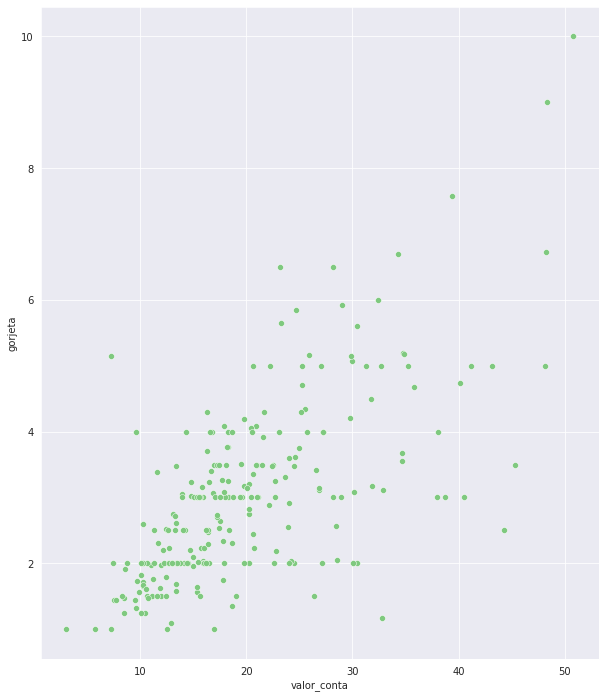

In [84]:
plt.figure(figsize = (10,12))    #Este comando cria uma figura. O figsize determina o tamanho do eixo x e y, nesta ordem.
sns.set_palette('Accent')     #Coloquei uma paleta de cores
sns.set_style('darkgrid')     #Coloquei um grid dark
ax = sns.scatterplot(x ='valor_conta', y = 'gorjeta', data = dados)

**Na ordem vamos:**


*   Colocar título posicionado
*   Aumentar o tamanho das legendas


**Perceba que o set_title e o set_label são colocados dentro do ax, pois o ax é a figura onde será colocado os dados. Então estou colocado título e legenda na figura.**

**O fontsize determina o tamanho da letra desejada**

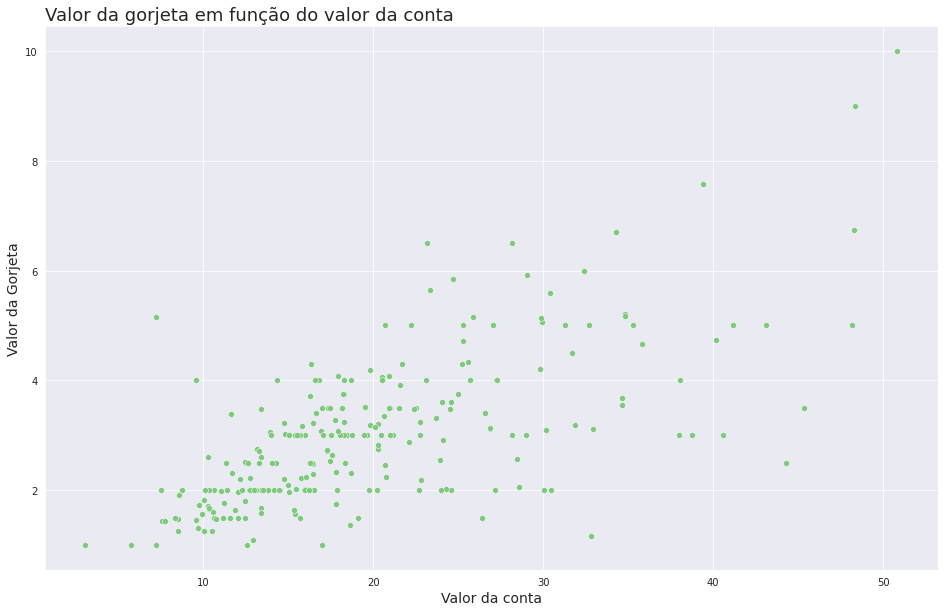

In [82]:
ax = plt.figure(figsize = (16,10))    
sns.set_palette('Accent')     
sns.set_style('darkgrid') 
ax = sns.scatterplot(x ='valor_conta', y = 'gorjeta', data = dados)    
ax.set_title('Valor da gorjeta em função do valor da conta', loc = 'left',fontsize = 18)
ax.set_xlabel('Valor da conta', fontsize = 14)
ax.set_ylabel('Valor da Gorjeta', fontsize = 14)
ax = ax    # Este comando tira a frase que aparece quando pedimos o gráfico

**Abaixo apresente o gráfico lmplot das sobremesas para mostrar que o estilo do gráfico e o grid já foram alterados automaticamente. Dá para perceber que o gráfico não é branco e sem grid como o primeiro que fizemos.**

 **Isto mostra que os comandos das paletas não precisam ser escritos todas as vezes. É interessante já deixar a paleta desejada no momento de importar a biblioteca**

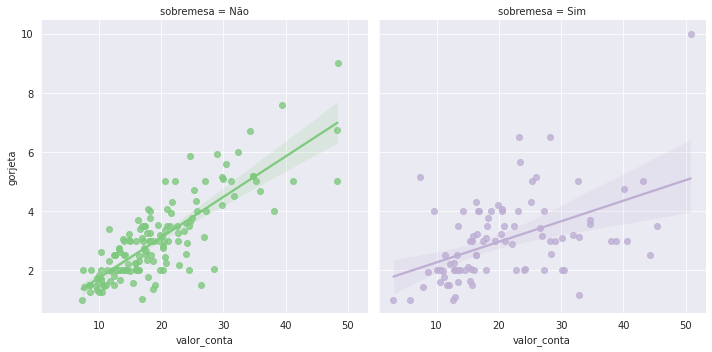

In [83]:
sns.lmplot(x='valor_conta', y = 'gorjeta', hue = 'sobremesa', col='sobremesa', data = dados)

# Análise 1 - Criando campo porcentagem

**Para analisar se o aumento da gorjeta é progressivo com o aumento do valor da conta fizemos um gráfico de porcentagem e vamos realziar o gráfico**

In [18]:
dados['Porcentagem'] = (dados['gorjeta']/dados['valor_conta']).round(3)

In [19]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Janta,2,0.059
1,10.34,1.66,Não,Dom,Janta,3,0.161
2,21.01,3.50,Não,Dom,Janta,3,0.167
3,23.68,3.31,Não,Dom,Janta,2,0.140
4,24.59,3.61,Não,Dom,Janta,4,0.147


**Para fazer o gráfico abaixo apenas alterou-se o valor passado para y de gorjeta para Porcentagem**

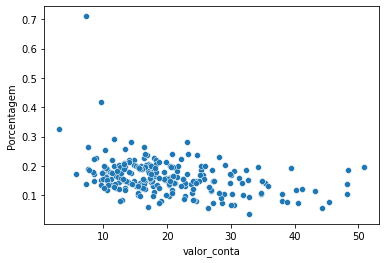

In [20]:
porcentagem_conta = sns.scatterplot(x = 'valor_conta',y = 'Porcentagem', data = dados)

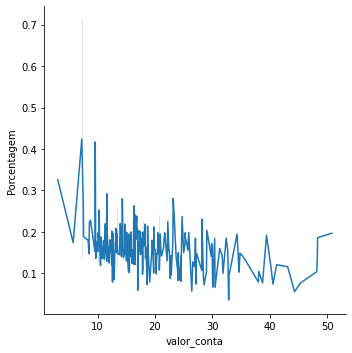

In [21]:
porcentagem_conta_linha = sns.relplot(x = 'valor_conta',y='Porcentagem',kind ='line',data = dados)

**Abaixo apresento o gráfico lmplot que é um scatter plot com uma linha de regressão linear para apresentar em conjunto com os dados a tendência dos dados**

**Um gráfico lmplot é muito interessante para agilizar a análise visual**

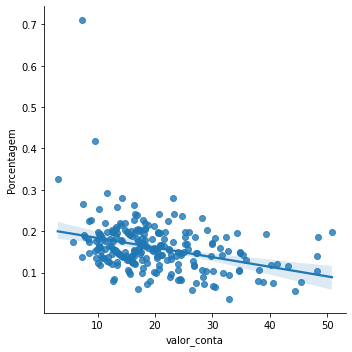

In [22]:
sns.lmplot(x = 'valor_conta',y = 'Porcentagem', data = dados)

***No gráfico acima percebe-se que a tendência da porcentagem é diminuir. Ou seja, quanto maior o valor da conta, menor é a porcentagem. O valor da gorjeta aumenta, mas a porcentagem dessa gorjeta diminui***

**Para colcoar um título no gráfico utiliza-se a variável em que salvou o gráfico.figure.suptitle()**

**Para ver novamente a figura utiliza-se o .get_figure()**

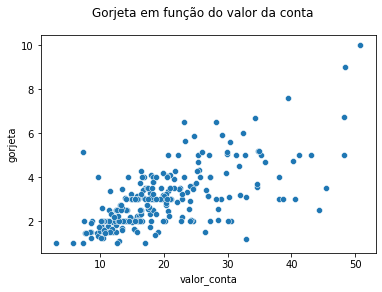

In [23]:
valor_gorjeta.figure.suptitle('Gorjeta em função do valor da conta')
valor_gorjeta.get_figure()

# Analise 2: sobremesa
**Será que a gorjeta aumenta para quem pede sobremesa ou não?**

**O catplot é chamado de gráfico categórigo. É possível ver a distribuição de quem pediu e quem não pediu sobremesa e o valor da gorjeta**

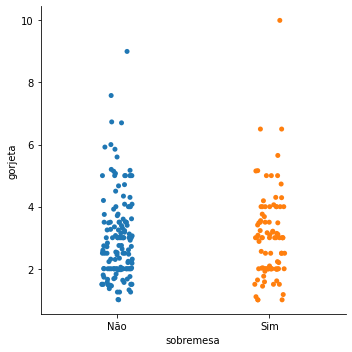

In [24]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data= dados)

**O relplot é outro estilo de gráfico para avaliar a tendência de um dado.**
**O elemento interno do parênteses, hue, serve para diferenciar por cor os dados de uma variável. Neste caso foi diferenciado quem tinha e quem não tinha pedido sobremesa**

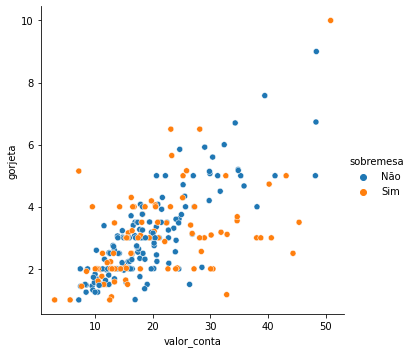

In [25]:
sns.relplot( x='valor_conta', y = 'gorjeta', hue = 'sobremesa', data = dados)

**O elemento interno do parênteses, col, seperada em dois ou mais gráficos por tipo de variável passada. Neste caso dois gráficos foram criados, um para quem pediu sobremesa e outra para quem não pediu**

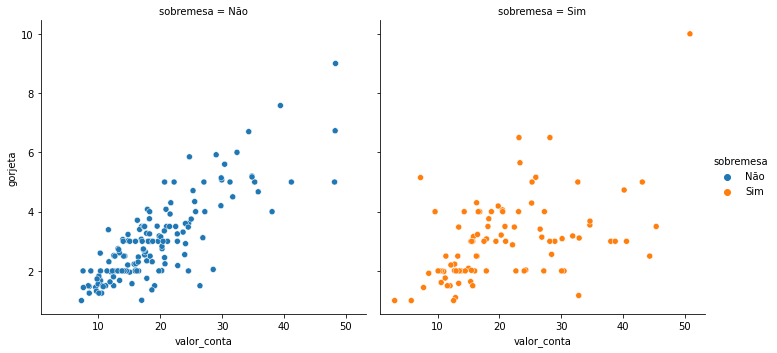

In [26]:
sns.relplot(x='valor_conta', y = 'gorjeta', hue = 'sobremesa', col='sobremesa', data = dados)

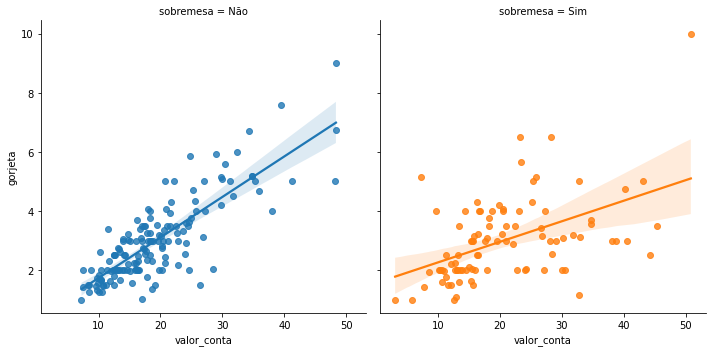

In [27]:
sns.lmplot(x='valor_conta', y = 'gorjeta', hue = 'sobremesa', col='sobremesa', data = dados)

***No gráfico acima apresenta-se como tendência que a gorjeta de quem não pede sobremesa é maior de quem pede sobremesa***

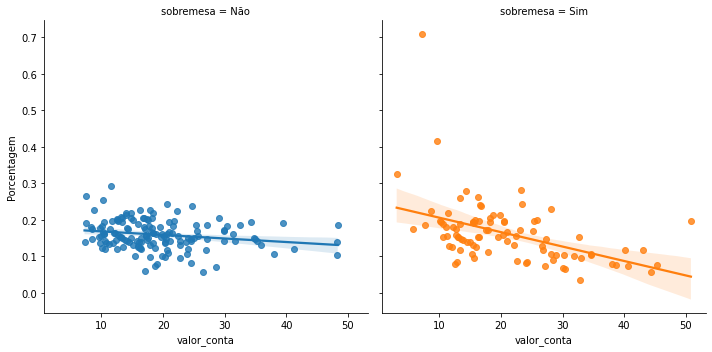

In [28]:
sns.lmplot(x='valor_conta', y = 'Porcentagem', hue = 'sobremesa', col='sobremesa', data = dados)

***No gráfico acima apresenta-se que quem pede sobremesa tem uma tendência maior de diminuir o valor da porcentagem da gorjeta em comparação de quem não pede sobremesa***

## Teste de hipótese

**A biblioteca scipy é uma biblioteca científica do python. E o ranksums faz teste de hipótese de correlação**

In [36]:
from scipy.stats import ranksums

**Uma query é uma seleção de dados do dataframe**
**Para fazer a análise vou pegar todos os dados porcentagem de quem pegou sobremesa numa variável e vou pegar todos os dados porcentagem de quem não pegou sobremesa em outra variável**

In [30]:
sobremesa = dados.query("sobremesa == 'Sim'").Porcentagem

In [31]:
sobremesa

56     0.079
58     0.157
60     0.158
61     0.145
62     0.180
       ...  
234    0.193
236    0.079
237    0.036
240    0.074
241    0.088
Name: Porcentagem, Length: 93, dtype: float64

In [32]:
sem_sobremesa = dados.query("sobremesa == 'Não'").Porcentagem

**Colocando as duas variáveis no ranksums e extraindo o pvalue obtemos qual é o grau de correlação entre as duas variáveis.**

**Para apresentar alta correlação temos que ter o pvalue tem que ser maior que 0,05**

In [33]:
r = ranksums(sobremesa,sem_sobremesa)

In [34]:
print('O valor do pvalue é: {} '.format(r.pvalue))

O valor do pvalue é: 0.5676760764441404 


***O resultado acima mostra que tem ambos os valores tem alta correlação e por isso a hipótese correta é que não há muita diferença de quem pediu e quem não pediu sobremesa***

# Análise 3: dia da semana
**O dia da semana altera o valor da gorjeta**

***O que foi feito na análise 2 será refeito na análise 3***

In [37]:
dados.dia.unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

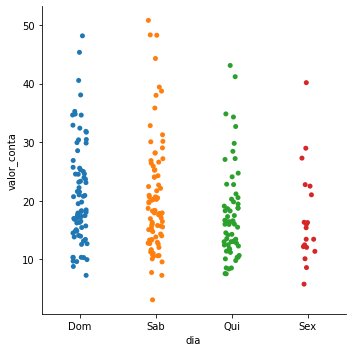

In [38]:
sns.catplot(x = 'dia', y = 'valor_conta', data = dados)

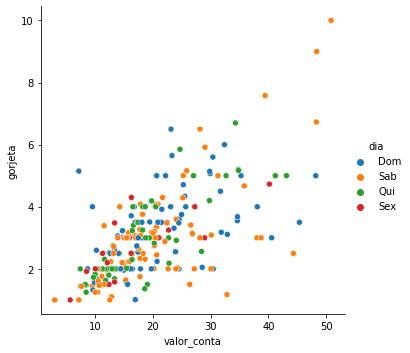

In [39]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', data = dados)

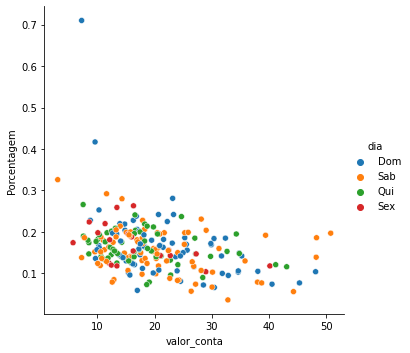

In [40]:
sns.relplot(x = 'valor_conta', y = 'Porcentagem', hue = 'dia', data = dados)

**Os 2 gráficos acima apresentam muita poluição visual, sendo difícil trazer uma análise mais acertiva. Para melhorar a visualização dos dados utilizei o elemento col para fazer um gráfico para cada dia**

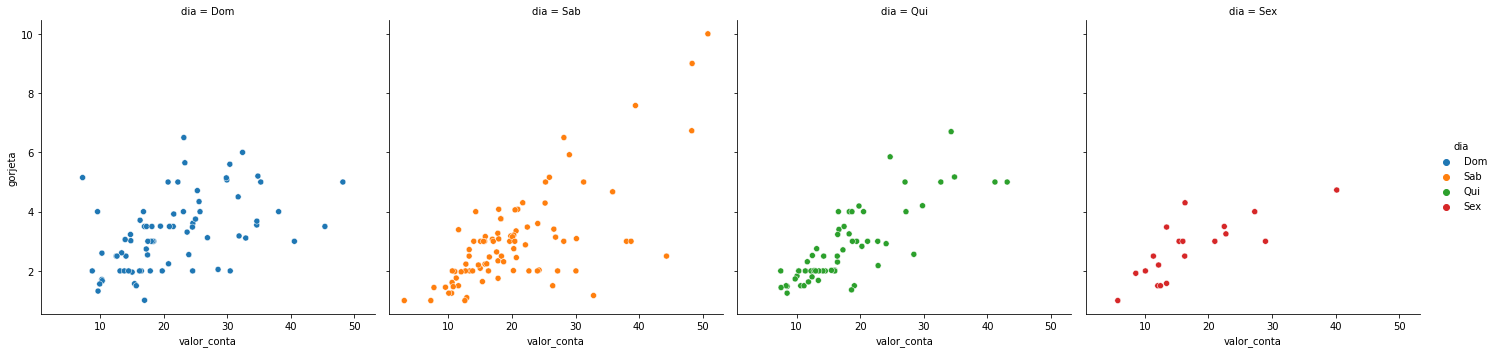

In [41]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', data = dados, col = 'dia')

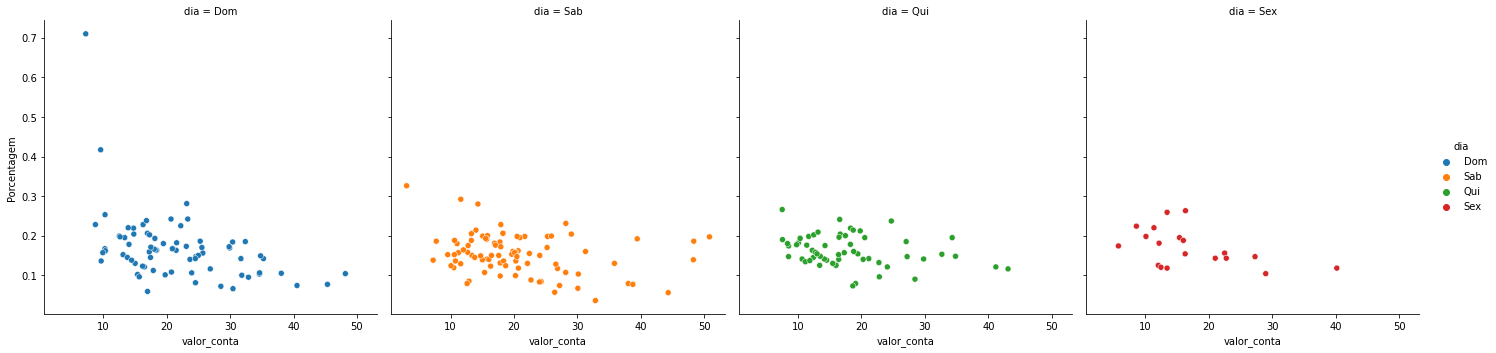

In [42]:
sns.relplot(x = 'valor_conta', y = 'Porcentagem', hue = 'dia', data = dados, col = 'dia')

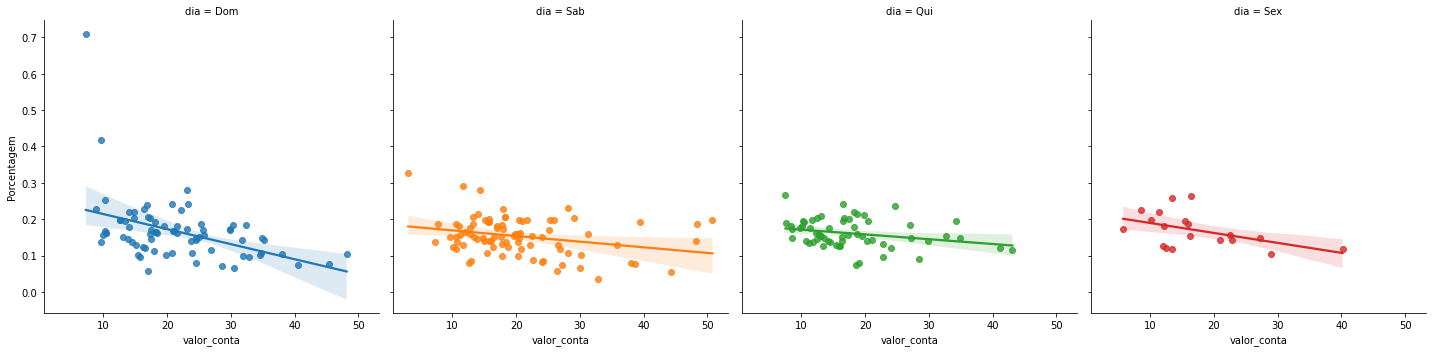

In [43]:
sns.lmplot(x = 'valor_conta', y = 'Porcentagem', hue = 'dia', data = dados, col = 'dia')

***Nos gráficos é possível ver a mesma tendência de aumento de gorjeta com o valor da conta e diminuição da porcentagem com o valor da conta. No entanto os dias domingo e sexta com o que apresentam mais essa tendência***

In [44]:
media_geral_gorjeta = dados.gorjeta.mean()

In [45]:
dados.groupby(by = 'dia').mean()[['valor_conta','gorjeta','Porcentagem']]

,valor_conta,gorjeta,Porcentagem
dia,,,
Dom,21.410000,3.255132,0.166921
Qui,17.682742,2.771452,0.161274
Sab,20.441379,2.993103,0.153149
Sex,17.151579,2.734737,0.170000


In [46]:
dados.dia.value_counts()

Sab    87
Dom    76
Qui    62
Sex    19
Name: dia, dtype: int64

## Teste de hipótese 2

In [47]:
conta_dom = dados.query("dia == 'Dom'").valor_conta

In [48]:
conta_sab = dados.query("dia == 'Sab'").valor_conta

In [49]:
ranksums(conta_dom, conta_sab)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

**O pvalue obtido foi maior que 0,05 e por isso a hipótese que devemos aceitar é que não há diferença entre os dias sábado e domingo**

# Análise 4: hora do dia
**O período do dia altera o valor da gorjeta?**

In [50]:
dados.hora_do_dia.unique()

array(['Janta', 'Almoço'], dtype=object)

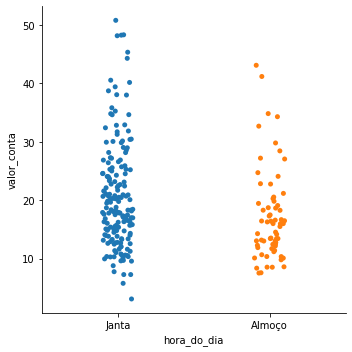

In [51]:
sns.catplot(x = 'hora_do_dia', y = 'valor_conta', data = dados)

**O elemento kind ='swarm' altera como a distribuição do catplot ocorre para apresentar de forma menos amontoada os dados**

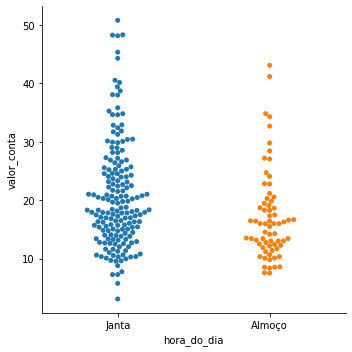

In [52]:
sns.catplot(x = 'hora_do_dia', y = 'valor_conta', kind = 'swarm',data = dados)

**O violinplot criar um gráfico onde há um aumento da grossura em torno da média dos valores**

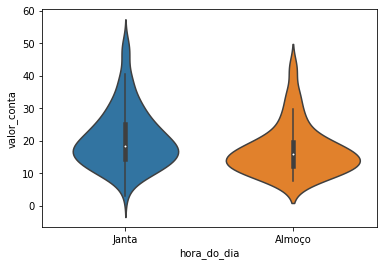

In [53]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_conta', data = dados)

**O boxplot apresenta a média, o desvio padrão e os valores de outliers que estão fora da faixa aceitável de valores**

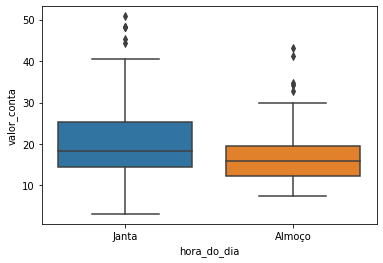

In [54]:
sns.boxplot(x = 'hora_do_dia', y ='valor_conta', data = dados)

In [55]:
almoco = dados.query("hora_do_dia == 'Almoço'").valor_conta

In [56]:
janta = dados.query("hora_do_dia == 'Janta'").valor_conta

**O distplot é um conjunto de histograma com padrão de distruibuição dos dados. Muito bom para averiguar se o conjunto segue uma distruibuição normal**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


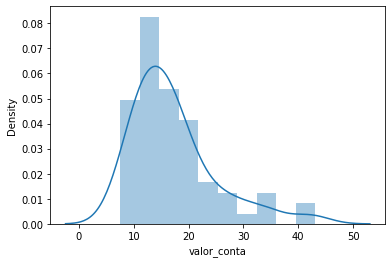

In [57]:
sns.distplot(almoco)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


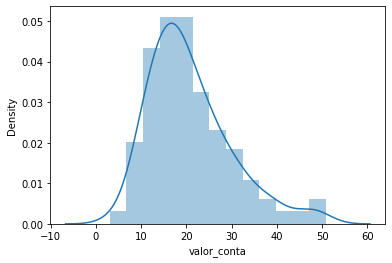

In [58]:
sns.distplot(janta)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


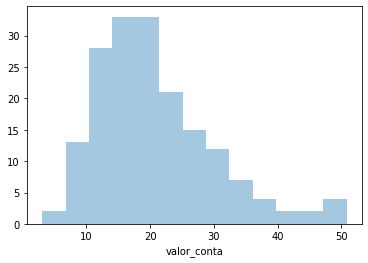

In [59]:
sns.distplot(janta, kde = False)

## Teste hipótese 3

In [60]:
dados.groupby(by = 'hora_do_dia').mean()[['valor_conta','gorjeta', 'Porcentagem']]

,valor_conta,gorjeta,Porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.164132
Janta,20.797159,3.102670,0.159534


In [61]:
ranksums(janta,almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

 ***p_value menor que 0,005 significa que os dois grupos não são iguais estatisticamente***

In [62]:
almoco_porcentagem = dados.query("hora_do_dia == 'Almoço'").Porcentagem

In [63]:
janta_porcentagem = dados.query("hora_do_dia == 'Janta'").Porcentagem

In [64]:
ranksums(almoco_porcentagem,janta_porcentagem)

RanksumsResult(statistic=1.1996415076212619, pvalue=0.23027859883366675)

 ***p_value menor que 0,005 significa que os dois grupos são iguais estatisticamente***

# Gráfico Barra Exemplo
#### Este gráfico barra tem objetivo de mostrar duas variáveis distintas de 4 nomes diferentes. 

In [4]:
import numpy as np

In [8]:
d1 = np.array([[2,4,6,8],[1,3,5,7]])
d1.T

array([[2, 1],
       [4, 3],
       [6, 5],
       [8, 7]])

In [25]:
df = pd.DataFrame(d1.T, columns = ['densidade1','densidade2'])
df['nomes'] = ['A','B','C','D']

In [26]:
df.head()

,densidade1,densidade2,nomes
0,2,1,A
1,4,3,B
2,6,5,C
3,8,7,D


#### o .melt funciona criando um dataframe onde uma ou mais variáveis são colocadas como variáveis de identificação. Neste meu exemplo quis colocar as densidade 1 e 2 dos nomes como varíaveis de identificação para criar meu gráfico.

In [27]:
df2 = df.melt('nomes', var_name = 'Tipo_densidade', value_name = 'Densidade')

In [28]:
df2.head()

,nomes,Tipo_densidade,Densidade
0,A,densidade1,2
1,B,densidade1,4
2,C,densidade1,6
3,D,densidade1,8
4,A,densidade2,1


<AxesSubplot:xlabel='Tipo_densidade', ylabel='Densidade'>

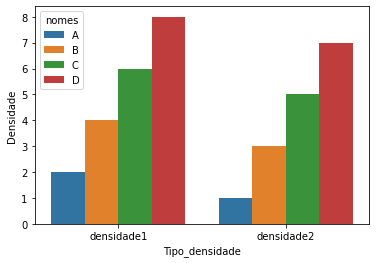

In [29]:
sns.barplot(x = 'Tipo_densidade', y = 'Densidade', data = df2, hue = 'nomes')